In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings("ignore")
from pandas import Int64Index as NumericIndex

data = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv")
#data["lag7"] = data["births"].shift(7)
#data["log"] = np.log(data["births"])
data["mean2"]=data["births"].rolling(window=2).mean().shift(1)
series["max2"]=series["births"].rolling(window=2).max().shift(1)
data = data.dropna()
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [422]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta
import calendar


## Grid Search


In [423]:
data

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week,mean2
2,3,2015-01-03,8328,Sat,2015,1,3,3,7,9459.0
3,4,2015-01-04,7065,Sun,2015,1,4,4,1,9589.0
4,5,2015-01-05,11892,Mon,2015,1,5,5,2,7696.5
5,6,2015-01-06,12425,Tue,2015,1,6,6,3,9478.5
6,7,2015-01-07,12141,Wed,2015,1,7,7,4,12158.5
...,...,...,...,...,...,...,...,...,...,...
360,361,2015-12-27,7518,Sun,2015,12,361,27,1,6904.5
361,362,2015-12-28,13100,Mon,2015,12,362,28,2,7406.0
362,363,2015-12-29,13458,Tue,2015,12,363,29,3,10309.0
363,364,2015-12-30,13100,Wed,2015,12,364,30,4,13279.0


In [424]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [425]:
train = data[:335]
test = data[335:]
x_train = train.drop(columns=["date","births","wday"])
y_train = train["births"]
x_test=test.drop(columns=["date","births","wday"])
y_test=test["births"]

In [426]:
param_grid = [
    {"n_estimators":[200,300], 'criterion':['squared_error','friedman_mse'], 'max_depth':[None,2,5,10,20,50,80], 'max_leaf_nodes':[None,2,5,10,20,50]}
]

reg = RandomForestRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 2, 5, 10, 20, 50, 80],
                          'max_leaf_nodes': [None, 2, 5, 10, 20, 50],
                          'n_estimators': [200, 300]}])

In [427]:
print('GridSearchCV Best Params:', grid_search.best_params_)

GridSearchCV Best Params: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_leaf_nodes': 50, 'n_estimators': 200}


In [428]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

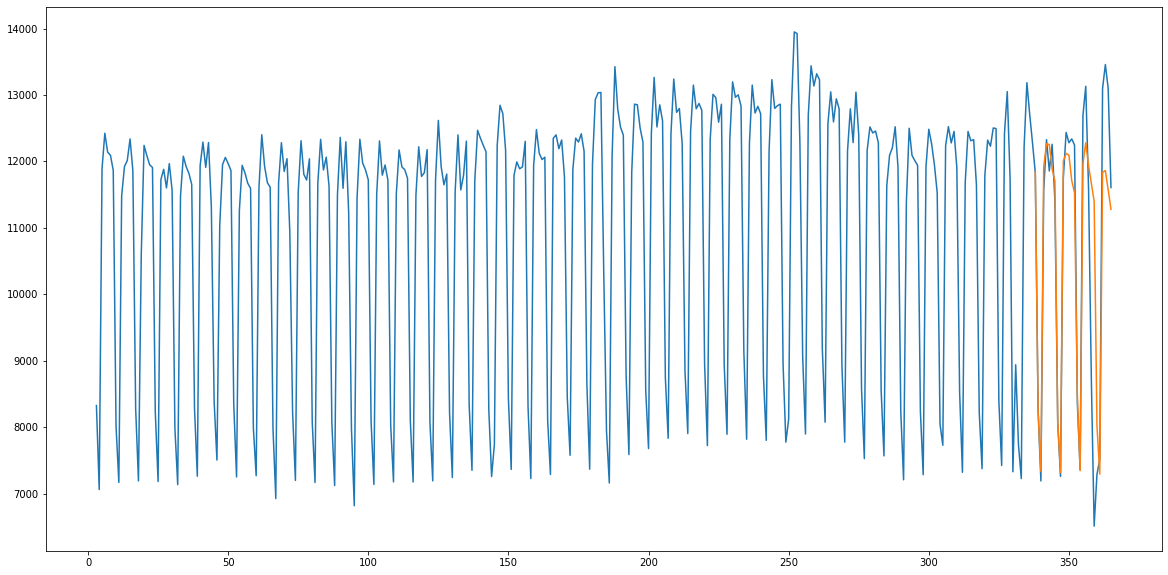

In [429]:
plt.figure(figsize=(20,10))
plt.plot(data["day_of_year"],data["births"])
plt.plot(x_test["day_of_year"], y_pred)


In [430]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(y_test,y_pred)

7.408556181435637